record date : the time of measurement according to time of sensor.      
create time : the time of transfer of the measurement to the database.                      
fixed time : the calculated time of measurement in terms of database time   




In [1]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestRegressor

In [2]:
# reading data as DataFrame from excel file 
df1 = pd.read_excel (r'Dataset - 1.xlsx', sheet_name='1234')
df2 = pd.read_excel (r'Dataset - 1.xlsx', sheet_name='4567')

In [3]:
# let's look at the shape and name of columns
print(df1.shape, df2. shape)
print(df1.columns)
print(df2.columns)

(395, 7) (286, 7)
Index(['bin_id', 'fullness_rate', 'fullness_rate_raw', 'temperature',
       'record_date', 'create_time', 'fixed_time'],
      dtype='object')
Index(['bin_id', 'fullness_rate (%)', 'fullness_rate_raw (cm)',
       'temperature (celcious)', 'record_date', 'create_time', 'fixed_time'],
      dtype='object')


In [4]:
# columns are same but their names differ for each sheet, they should have same name 
df2.columns = df1.columns

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 7 columns):
bin_id               395 non-null int64
fullness_rate        395 non-null float64
fullness_rate_raw    395 non-null object
temperature          395 non-null object
record_date          395 non-null object
create_time          395 non-null object
fixed_time           395 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 21.7+ KB


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 7 columns):
bin_id               286 non-null int64
fullness_rate        286 non-null float64
fullness_rate_raw    286 non-null object
temperature          286 non-null object
record_date          286 non-null object
create_time          286 non-null object
fixed_time           286 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 15.8+ KB


In [7]:
# getting avg. of 'fullness_rate_raw' column
# 'fullness_rate_raw' column's type is str, so it is converted to int
tmp_ser = []
avg_ser = []
for rate_col in df1['fullness_rate_raw']:
    tmp_ser = rate_col.split() 
    avg = 0
    summ = 0
    count = 0
    for i in tmp_ser:
        i = i.replace("[","")
        i = i.replace("]","")
        i = i.replace(",","")
        summ = summ + int(i)
        count += 1
    avg_ser.append(summ/count)
df1['avg_frate_raw'] = avg_ser

In [8]:
# getting avg. of 'fullness_rate_raw' column
# 'fullness_rate_raw' column's type is str, so it is converted to int
tmp_ser = []
avg_ser = []
for rate_col in df2['fullness_rate_raw']:
    tmp_ser = rate_col.split() 
    avg = 0
    summ = 0
    count = 0
    for i in tmp_ser:
        i = i.replace("[","")
        i = i.replace("]","")
        i = i.replace(",","")
        summ = summ + int(i)
        count += 1
    avg_ser.append(summ/count)
df2['avg_frate_raw'] = avg_ser

In [9]:
# converting datetime of date data
df1['record_date'] = pd.to_datetime(df1['record_date'])
df1['create_time'] = pd.to_datetime(df1['create_time'])
df1['fixed_time'] = pd.to_datetime(df1['fixed_time'])
df2['record_date'] = pd.to_datetime(df2['record_date'])
df2['create_time'] = pd.to_datetime(df2['create_time'])
df2['fixed_time'] = pd.to_datetime(df2['fixed_time'])

In [10]:
# calculating the transfer time and delay

dif11 = df1['create_time'] - df1['record_date']
df1['data_transfer_time'] = pd.to_timedelta(dif11).astype('timedelta64[s]').astype(float)
dif12 = df1['fixed_time'] - df1['record_date']
df1['measurement_delay'] = pd.to_timedelta(dif12).astype('timedelta64[s]').astype(float)

dif21 = df2['create_time'] - df2['record_date']
df2['data_transfer_time'] = pd.to_timedelta(dif21).astype('timedelta64[s]').astype(float)
dif22 = df2['fixed_time'] - df2['record_date']
df2['measurement_delay'] = pd.to_timedelta(dif22).astype('timedelta64[s]').astype(float)

In [11]:
# time intervals between records

rec_shifted1 = df1['record_date'].shift(periods=1)
df1['record_intervals_sec'] = df1['record_date'] - rec_shifted1
df1['record_intervals_sec'][0] = 0
df1['record_intervals_sec'] = pd.to_timedelta(df1['record_intervals_sec']).astype('timedelta64[s]').astype(float)
df1['record_intervals_min'] = df1['record_intervals_sec'] / 60

rec_shifted2 = df2['record_date'].shift(periods=1)
df2['record_intervals_sec'] = df2['record_date'] - rec_shifted2
df2['record_intervals_sec'][0] = 0
df2['record_intervals_sec'] = pd.to_timedelta(df2['record_intervals_sec']).astype('timedelta64[s]').astype(float)
df2['record_intervals_min'] = df2['record_intervals_sec'] / 60

C:\Users\ihkar\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\ihkar\Anaconda3\lib\site-packages\pandas\core\indexing.py:202: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\ihkar\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init

In [12]:
# fullness rate change for every record
full_shifted1 = df1['fullness_rate'].shift(periods=1)
df1['delta_fullness'] = df1['fullness_rate'] - full_shifted1
df1['delta_fullness'][0] = 0

full_shifted2 = df2['fullness_rate'].shift(periods=1)
df2['delta_fullness'] = df2['fullness_rate'] - full_shifted2
df2['delta_fullness'][0] = 0

C:\Users\ihkar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\ihkar\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


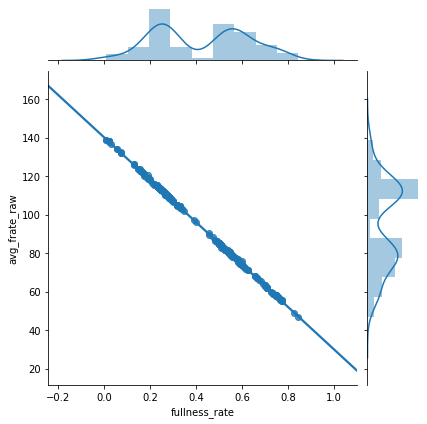

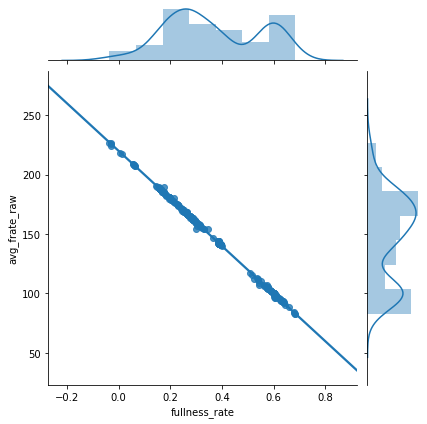

In [13]:
# 'fullnes_rate' and 'avg_frate_raw' are correlated, using 'fullnes_rate' is sufficient
sns.jointplot(x='fullness_rate', y ='avg_frate_raw', data = df1, kind ='reg')
sns.jointplot(x='fullness_rate', y ='avg_frate_raw', data = df2, kind ='reg')

In [14]:
# cumulative time intervals between records
df1['interval_cumsum'] = df1['record_intervals_min'].cumsum()
df2['interval_cumsum'] = df2['record_intervals_min'].cumsum()

In [15]:
# cumsum of delta_fullness
df1['delta_fullness_cumsum'] = df1['delta_fullness'].cumsum()
df2['delta_fullness_cumsum'] = df2['delta_fullness'].cumsum()

Text(0.5, 0, 'Total time passed in min')

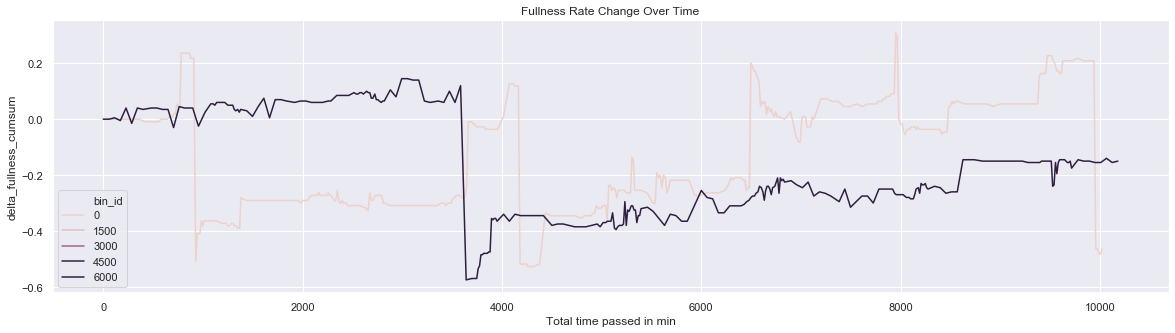

In [16]:
# fullness change over time
df = pd.concat([df1, df2])
sns.set(rc={'figure.figsize':(20,5)})
lm = sns.lineplot(x='interval_cumsum', y ='delta_fullness_cumsum', hue = 'bin_id', data = df)
lm.set_title('Fullness Rate Change Over Time')
lm.set_xlabel('Total time passed in min')

In [17]:
# dropping the records that show collecting garbage from containers in order to remove outliers in the data
df1.drop(index = df1[df1['delta_fullness']<(-0.2)].index, inplace = True)
df2.drop(index = df2[df2['delta_fullness']<(-0.2)].index, inplace = True)

In [18]:
# cumsum of delta_fullness
df1['delta_fullness_cumsum'] = df1['delta_fullness'].cumsum()
df2['delta_fullness_cumsum'] = df2['delta_fullness'].cumsum()

In [19]:
# finding fullness rate's change intervals

df1['change_date'] = df1['record_date'][df1['delta_fullness'] != 0]
tmp1 = df1['interval_cumsum'][df1['delta_fullness'] != 0]
tmp1_shifted = tmp1.shift(periods=1)
tmp1_shifted[tmp1.index[0]] = 0
df1['change_interval'] = tmp1 - tmp1_shifted

df2['change_date'] = df2['record_date'][df2['delta_fullness'] != 0]
tmp2 = df2['interval_cumsum'][df2['delta_fullness'] != 0]
tmp2_shifted = tmp2.shift(periods=1)
tmp2_shifted[tmp2.index[0]] = 0
df2['change_interval'] = tmp2 - tmp2_shifted

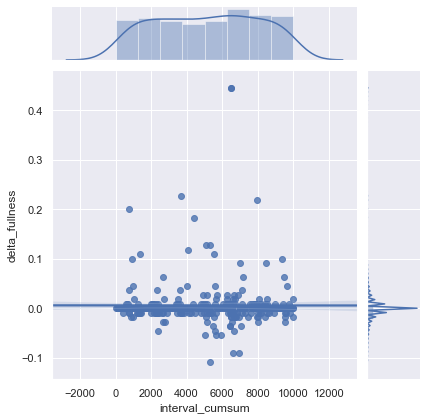

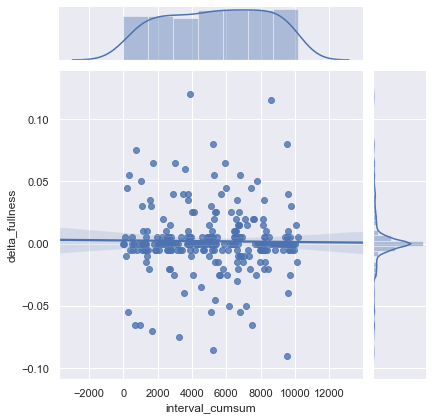

In [20]:
sns.jointplot(x='interval_cumsum', y ='delta_fullness', data = df1, kind ='reg')
sns.jointplot(x='interval_cumsum', y ='delta_fullness', data = df2, kind ='reg')

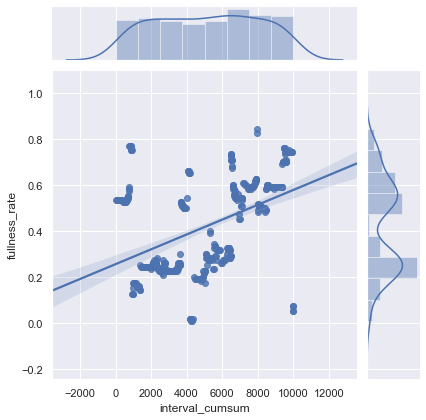

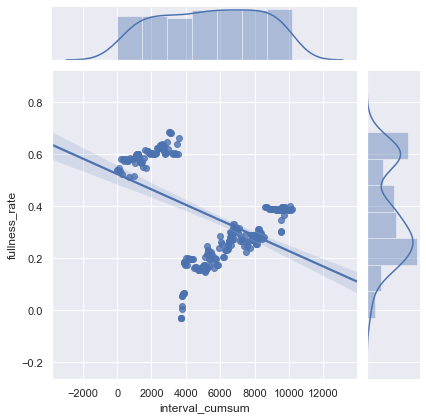

In [21]:
sns.set(rc={'figure.figsize':(20,5)})
sns.jointplot(x='interval_cumsum', y ='fullness_rate', data = df1, kind ='reg')
sns.jointplot(x='interval_cumsum', y ='fullness_rate', data = df2, kind ='reg')

In [22]:
# cumsum of delta_fullness after dropping dumping data
df1['delta_fullness_cumsum'] = df1['delta_fullness'].cumsum()
df2['delta_fullness_cumsum'] = df2['delta_fullness'].cumsum()

Text(0.5, 0, 'Total time passed in min')

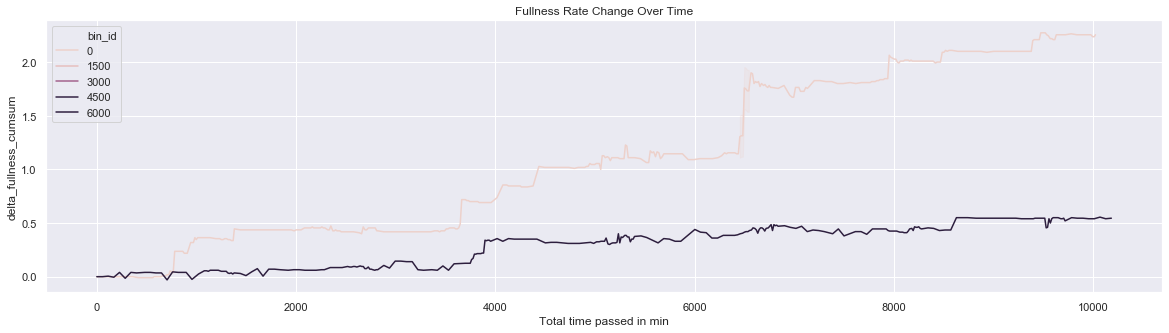

In [23]:
# fullness change over time after dropping dumping data
df = pd.concat([df1, df2])
sns.set(rc={'figure.figsize':(20,5)})
lm = sns.lineplot(x='interval_cumsum', y ='delta_fullness_cumsum', hue = 'bin_id', data = df)
lm.set_title('Fullness Rate Change Over Time')
lm.set_xlabel('Total time passed in min')

In [24]:
# preparing data for linear regression
X1 = pd.DataFrame(df1['interval_cumsum'])
y1 = pd.DataFrame(df1['delta_fullness_cumsum'])
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.20, random_state=42)

X2 = pd.DataFrame(df2['interval_cumsum'])
y2 = pd.DataFrame(df2['delta_fullness_cumsum'])
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.20, random_state=42)

In [25]:
# linear regression with sklearn
reg = LinearRegression()
model1 = reg.fit(X_train1, y_train1)
print('model1\'s parameters : ',model1.intercept_, model1.coef_)

reg = LinearRegression()
model2 = reg.fit(X_train2, y_train2)
print('model1\'s parameters : ',model2.intercept_, model2.coef_)

model1's parameters :  [-0.14135394] [[0.00024875]]
model1's parameters :  [-0.0209665] [[6.12423873e-05]]


In [26]:
print('model1\'s accuracy :',model1.score(X_test1,y_test1))
print('model2\'s accuracy :',model2.score(X_test2,y_test2))
# our model score is 0.96 and 0.92 which is very good

model1's accuracy : 0.9617596772237641
model2's accuracy : 0.9255012535174965


In [27]:
# predictions after 12 and 24 hours
X_predict = [[12*60], [24*60]]
print('Predictions for bin 1234 for 12 and 24 hours respectively: ',model1.predict(X_predict))
print('Predictions for bin 4567 for 12 and 24 hours respectively: ',model2.predict(X_predict))

Predictions for bin 1234 for 12 and 24 hours respectively:  [[0.03774459]
 [0.21684312]]
Predictions for bin 4567 for 12 and 24 hours respectively:  [[0.02312802]
 [0.06722254]]


In [28]:
# predictions with RandomrForrestRegressor
model11 = RandomForestRegressor()
model21 = RandomForestRegressor()

model11.fit(X_train1,y_train1)
model21.fit(X_train2,y_train2)

C:\Users\ihkar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ihkar\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
C:\Users\ihkar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ihkar\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [29]:
print('model11\'s accuracy :',model1.score(X_test1,y_test1))
print('model21\'s accuracy :',model2.score(X_test2,y_test2))
# our model score is 0.99 and 0.99 which is very good

model11's accuracy : 0.9617596772237641
model21's accuracy : 0.9255012535174965


In [30]:
print('Predictions for bin 1234 for 12 and 24 hours respectively: ',model11.predict(X_predict))
print('Predictions for bin 4567 for 12 and 24 hours respectively: ',model21.predict(X_predict))

Predictions for bin 1234 for 12 and 24 hours respectively:  [0.01818182 0.42454545]
Predictions for bin 4567 for 12 and 24 hours respectively:  [-0.008   0.0245]
